In [1]:
import sys
%load_ext autoreload
sys.path.append('..')

In [90]:
%autoreload 2
from FEMOL import RectangleQuadMesh, FEM_Problem, TOPOPT_Problem, TOPOPT_Results
from FEMOL_utils import *
import timeit
import numpy as np
import matplotlib.animation as animation
from scipy.optimize import fsolve
np.set_printoptions(linewidth=110)
from IPython.display import display, clear_output

# Plane Stress Guitar Topology Optimization

## Domain Functions

In [36]:
# Domain functions

def outside_circle(x_pos, y_pos, R):
    
    def circle(x, y):
        
        if (x-x_pos)**2 + (y-y_pos)**2 > R**2:
            return True
        else:
            return False
    
    return circle

def inside_circle(x_pos, y_pos, R):
    
    def circle(x, y):
        
        if (x-x_pos)**2 + (y-y_pos)**2 < R**2:
            return True
        else:
            return False
    
    return circle

def outside_box(x1, x2, y1, y2):
    """
    x1 < x2 & y1 < y2
    """

    def box(x, y):
        
        return ~((x > x1) & (x < x2) & (y > y1) & (y < y2))
    
    return box

nelx = 40 # elements in the x direction
nely = 40 # elements in the y direction
# Creating the mesh
Lx = nelx
Ly = nely

mesh = FEMOL.mesh.rectangleQ4(Lx, Ly, nelx, nely)
mesh.plot()

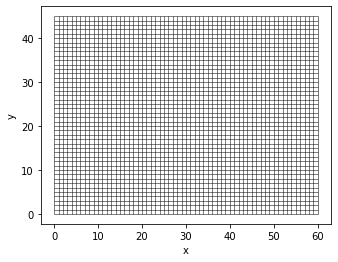

In [95]:
nelx = 60 # elements in the x direction
nely = 45 # elements in the y direction
volfrac = 0.1 # Volume fraction of material
penal = 3 # Penalization power

# Creating the mesh
Lx = nelx
Ly = nely

x = np.linspace(0, Lx, nelx)
y = np.linspace(0, Ly, nely)
X, Y = np.meshgrid(x, y)

mesh = RectangleQuadMesh(Lx, Ly, nelx, nely)
mesh.plot()

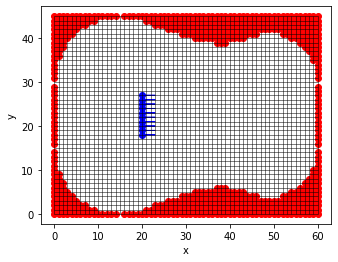

In [96]:
FEM_Guitar = FEM_Problem(mesh)


# K Matrix formulation
E = 1
nu = 0.3
t = 1
FEM_Guitar.isotropic_plane_stress_tensor(E, nu, t)
FEM_Guitar.get_plane_stress_Ke()


# Outside domain
circle1 = outside_circle((2*Ly/6), (2*Ly/6), (2*Ly/6))
circle2 = outside_circle((2*Ly/6), (4*Ly/6), (2*Ly/6))
circle3 = outside_circle((Lx-Ly/4) , 2*Ly/6, Ly/4)
circle4 = outside_circle((Lx-Ly/4) , 4*Ly/6, Ly/4)
box1 = outside_box(0, Lx, 2*Ly/6, 4*Ly/6)
sides = guitar_sides(Lx, Ly)
sound_hole = inside_circle(2*Lx/3, Ly/2, Ly/7)

def fixed_guitar(x, y):
    if np.array([circle1(x,y), circle2(x,y), circle3(x,y), circle4(x,y), box1(x,y), sides(x, y)]).all():
        return True
    else:
        return False
def voided_guitar(x, y):
    if np.array([circle1(x,y), circle2(x,y), circle3(x,y), circle4(x,y), box1(x,y), sides(x, y)]).all():
        return True
    elif sound_hole(x,y):
        return True
    else:
        return False 
    


x = [Lx/3]
y = [[8*Ly/20, 12*Ly/20]]
force_domain = create_domain(x, y)
force = [[10, 0]]


FEM_Guitar.add_fixed_domain(fixed_guitar)
#FEM_Guitar.add_fixed_domain(sound_hole)
FEM_Guitar.add_forces(force, [force_domain])
FEM_Guitar.assemble_plane_stress()
FEM_Guitar.fix_boundary()
FEM_Guitar.plot()

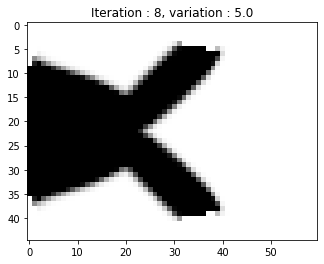

In [98]:
TOPOPT_Guitar = TOPOPT_Problem(FEM_Guitar, volfrac=0.32)
Result3 = TOPOPT_Guitar.solve(converge=0.05, void_domain=voided_guitar)

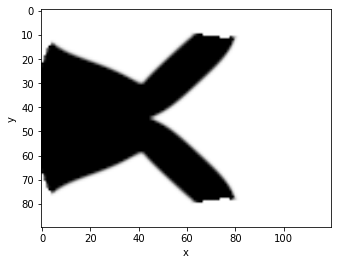

In [78]:
Result3.plot()

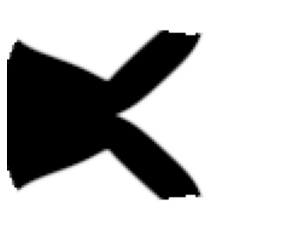

In [80]:
Result3.animate('guitar')

In [89]:
Result3.save('guitar')


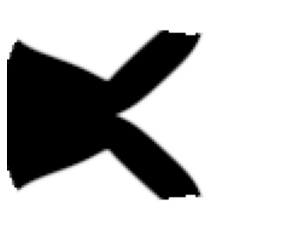

In [94]:
new_result = TOPOPT_Results(mesh)
new_result.load('guitar')
new_result.animate('guitar_anime')

In [83]:
Solutions = np.loadtxt('Plane_Stress_Guitar')

In [ ]:
def f(n):
    return n +1

def iterate():
    n = 0
    while n <10È
        n = f(n)
        return n
    
res  = iterate()